In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import linregress


In [4]:
# Import the Health data
health_df = pd.read_csv('Source Data/HEALTH.csv')
# Import the tax data
tax_df = pd.read_csv('Source Data/TAXES.csv')
# Import the socioeconomic data
income_df = pd.read_csv('Source Data/SOCIOECONOMIC.csv')
# concatenate the two county and state in each dataframe
health_df['County and State Key'] = health_df['County'] + ", " + health_df['State']
tax_df['County and State Key'] = tax_df['County'] + ", " + tax_df['State']
income_df['County and State Key'] = income_df['County'] + ", " + income_df['State']
# Merge data into one dataframe
health_and_tax_df = pd.merge(health_df,tax_df,on='County and State Key',how='inner')
health_tax_inc_df = pd.merge(health_and_tax_df,income_df,on='County and State Key',how='inner')

In [15]:
# Bin the data into groups
# Find max income for bins
max_inc = health_tax_inc_df['MEDHHINC15'].max()
# Bins and Labels
income_bins = [0,42508,51294,130000]
bin_labels = ['Low','Medium','High']
# Create bins
health_tax_inc_df['Income Bracket'] = pd.cut(health_tax_inc_df['MEDHHINC15'], bins=income_bins,labels=bin_labels)

health_tax_inc_df = health_tax_inc_df.dropna()
health_tax_inc_df.count()


FIPS_x                   2300
State_x                  2300
County_x                 2300
PCT_DIABETES_ADULTS08    2300
PCT_DIABETES_ADULTS13    2300
PCT_OBESE_ADULTS12       2300
PCT_OBESE_ADULTS17       2300
PCT_HSPA17               2300
RECFAC11                 2300
RECFAC16                 2300
PCH_RECFAC_11_16         2300
RECFACPTH11              2300
RECFACPTH16              2300
PCH_RECFACPTH_11_16      2300
County and State Key     2300
FIPS_y                   2300
State_y                  2300
County_y                 2300
SODATAX_STORES14         2300
SODATAX_VENDM14          2300
CHIPSTAX_STORES14        2300
CHIPSTAX_VENDM14         2300
FOOD_TAX14               2300
FIPS                     2300
State                    2300
County                   2300
PCT_NHWHITE10            2300
PCT_NHBLACK10            2300
PCT_HISP10               2300
PCT_NHASIAN10            2300
PCT_NHNA10               2300
PCT_NHPI10               2300
PCT_65OLDER10            2300
PCT_18YOUN

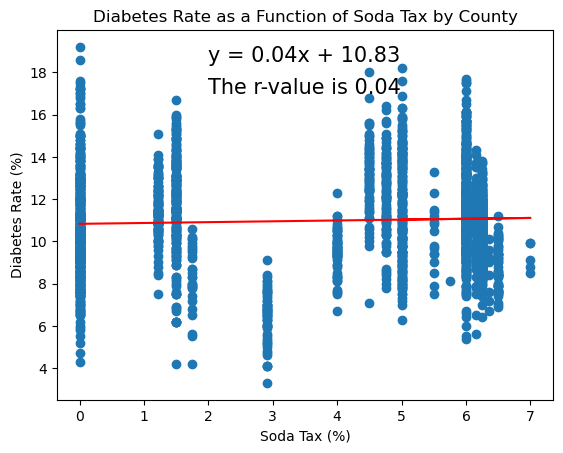

In [18]:
# scatterplot of soda tax and gym access rate and find a line of best fit
diabetes_rate = health_tax_inc_df['PCT_DIABETES_ADULTS13']
soda_tax = health_tax_inc_df['SODATAX_STORES14']
# Linear Regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(soda_tax,diabetes_rate)
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
regress_values = soda_tax * slope + intercept
rvalue = round(rvalue,2)
# plot
plt.scatter(soda_tax,diabetes_rate)
plt.xlabel('Soda Tax (%)')
plt.ylabel('Diabetes Rate (%)')
plt.title('Diabetes Rate as a Function of Soda Tax by County')
plt.annotate(line_eq,(2,18.5),fontsize=15,color="black")
plt.annotate((f"The r-value is {rvalue}"),(2,17), fontsize=15, color="black")
plt.plot(soda_tax,regress_values,'r-')
plt.savefig('Diabetes Rate as a Function of Soda Tax.png')
plt.show()

In [19]:
# Group Key fields by state for better figures
soda_tax_by_st = health_tax_inc_df.groupby('State')['SODATAX_STORES14'].mean()
avg_diabetes_rate_by_st = health_tax_inc_df.groupby('State')['PCT_DIABETES_ADULTS13'].mean()
avg_med_inc_by_st = health_tax_inc_df.groupby('State')['MEDHHINC15'].mean()
state_df = pd.DataFrame({"Soda Tax in Stores (%)": soda_tax_by_st,
                       "Average Diabetes Rate (%)":avg_diabetes_rate_by_st,
                       "Average Median Income ($)":avg_med_inc_by_st})
state_df.head()

,Soda Tax in Stores (%),Average Diabetes Rate (%),Average Median Income ($)
State,,,
AK,0.00,7.095455,63578.954545
AR,1.50,13.174627,38984.194030
AZ,0.00,11.093333,44016.733333
CA,6.50,8.759649,57765.543860
CO,2.91,6.482258,54271.983871


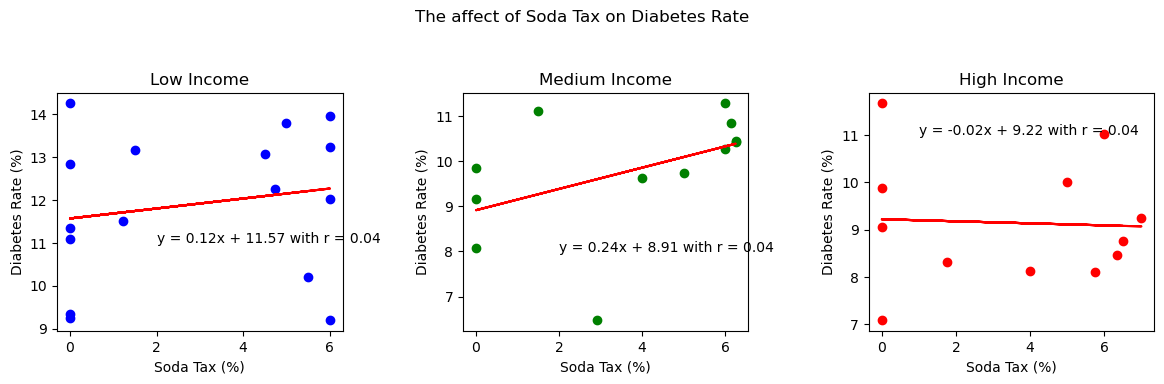

In [32]:
# Bins and Labels
income_bins = [0,47000,56000,130000]
bin_labels = ['Low','Medium','High']
# Create bins
state_df['Income Bracket'] = pd.cut(state_df['Average Median Income ($)'], bins=income_bins,labels=bin_labels)


# create series of each income bracket for charts
diabetes_low = state_df.loc[(state_df['Income Bracket'] == 'Low'),'Average Diabetes Rate (%)']
soda_tax_low = state_df.loc[(state_df['Income Bracket'] == 'Low'),'Soda Tax in Stores (%)']
diabetes_med = state_df.loc[(state_df['Income Bracket'] == 'Medium'),'Average Diabetes Rate (%)']
soda_tax_med = state_df.loc[(state_df['Income Bracket'] == 'Medium'),'Soda Tax in Stores (%)']
diabetes_high = state_df.loc[(state_df['Income Bracket'] == 'High'),'Average Diabetes Rate (%)']
soda_tax_high = state_df.loc[(state_df['Income Bracket'] == 'High'),'Soda Tax in Stores (%)']
# Create lin reg equation for each chart
groups = state_df['Income Bracket'].unique()
# Create empty lists to store
equation_list = []
equation_line = []
# Loop through groups to store equations and lines to put on sublot
for group in groups:
    group_data = state_df[state_df['Income Bracket'] == group]
    slope, intercept, r_value, p_value, std_err = linregress(group_data['Soda Tax in Stores (%)'], group_data['Average Diabetes Rate (%)'])
    x_values = group_data['Soda Tax in Stores (%)']
    # Build equation for each group
    Equation = f"y = {slope:.2f}x + {intercept:.2f} with r = {round(rvalue,2)}"
    line = x_values * slope + intercept
    # store equation in list
    equation_list.append(Equation)
    equation_line.append(line)
# Create Subplots
# Figure Size
plt.figure(figsize=(12, 4))
# Subplot 1
plt.subplot(1,3,1)
plt.scatter(soda_tax_low,diabetes_low,color='blue')
plt.annotate(equation_list[1],(2,11),fontsize=10,color="black")
plt.xlabel('Soda Tax (%)')
plt.ylabel('Diabetes Rate (%)')
plt.title('Low Income')
plt.plot(soda_tax_low,equation_line[1],'r-')
# Subplot 2
plt.subplot(1,3,2)
plt.scatter(soda_tax_med,diabetes_med,color='green')
plt.annotate(equation_list[2],(2,8),fontsize=10,color="black")
plt.xlabel('Soda Tax (%)')
plt.ylabel('Diabetes Rate (%)')
plt.title('Medium Income')
plt.plot(soda_tax_med,equation_line[2],'r-')
# Subplot 3
plt.subplot(1,3,3)
plt.scatter(soda_tax_high,diabetes_high,color='red')
plt.annotate(equation_list[0],(1,11),fontsize=10,color="black")
plt.xlabel('Soda Tax (%)')
plt.ylabel('Diabetes Rate (%)')
plt.title('High Income')
plt.plot(soda_tax_high,equation_line[0],'r-')
# Add overall title
plt.suptitle('The affect of Soda Tax on Diabetes Rate')
plt.tight_layout(pad=2.0)
# Save plot
plt.savefig('Affect of Soda Tax on Diabetes Rate.png')
# Show Plot
plt.show()
